{7: 9, 9: 6, 5: 1, 12: 1, 8: 9, 6: 1}


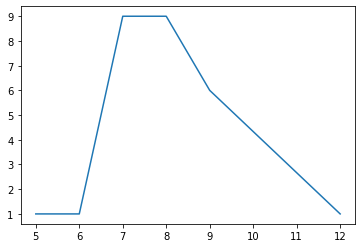

In [7]:
# Lagocephalus lagocephalus is species of pelagic pufferfish that spends most of its life in the desert of the open ocean
# well away from continental shelves. Due to this preference for the high seas, L. lagocephalus is not often collected in
# routine sampling by research vessels or commercial trawlers. However, I have a theory that during the winter months
# these fish may venture closer to shore. To see if there is any basis for this claim, I am using data from the iDigBio
# databse acquired by querying its API, converting the resulting JSON into a dictionary, parsing out the data
# for which month the specimens were collected, and then plotting these data. There are several things I'd like to
# improve (for instance, I tried limiting the records to the Northern Hemisphere by using the "country" index and
# populating the JSON with only USA records). Of course I also have to contend with differences in climatological 
# cycles between the Pacific and Atlantic (El Ni~no Years, hurricanes), but it is nice to see at least one peak
# around the end of the summer! Now to charter a vessel...


# import necessary packages
import json
import requests
import matplotlib.pylab as plt

# design query to pull up US specimen records for Lagocephalus lagocephalus
query = {
        "rq": {
            "genus": "lagocephalus",
            "specificepithet": "lagocephalus",
            "country" : ["united states", "usa"], 
            "uuid": {
                "type": "range",
                "gt": "00000000-0000-0000-0000-000000000000",
                "lte": "ffffffff-ffff-ffff-ffff-ffffffffffff"
                }
            },
        # sort results by uuid in ascending order
        "sort": [
            {
                "uuid": "asc"
                }
            ],
        # set an upper limit of 800 records per json
        "limit": 800,
        # tell the query not to skip records
        "offset": 0
        }

# create an empty dictionary to be populated by records
monthrecords = {}

# assign response from post request containing query to the variable "response"
response = requests.post("http://search.idigbio.org/v2/search/records/", json=query)
# convert the json file from the post request response as a python dictionary and assign it to "records"
records = response.json(strict=False)
# set up a counter variable to ensure I am looping through each record
x = 0
# begin looping through nested dictionaries
for line in records["items"] :
    # using counter variable to loop
    line = x
    # checking whether there is 'month' data in the record
    if "dwc:month" in records["items"][line]["data"]:
        # converting non-standard numerical values for 'month' into integers
        value = abs(int(records["items"][line]["data"]["dwc:month"]))
        # weeding out non-useful month values
        if value > 0:
            #checking whether 'month' value is already recorded in originally-empty dictionary
            if (value in monthrecords): 
                # updating number of ocurrences for existing month value
                monthrecords[value] += 1
                # updating counter variable
                x = x + 1
                continue
            else: 
                # adding new month value and giving it 1 occurence record
                monthrecords[value] = 1
                x = x + 1
                continue
        else:
            x = x + 1
            continue
    else:
        x = x + 1
        continue
# print dictionary to check my raw data
print(monthrecords)

# sort dictionary keys numerically and return a list of tuples
lists = sorted(monthrecords.items())
# parse tuples into a pair of lists to be used as values for the x and y axes of my graph
x, y = zip(*lists)
# plot the graph
plt.plot(x, y)
# displays plot
plt.show()